# *Lecture 6*

# Introduction to Monte Carlo Methods

| |
|:---:|
|Selected content [From **COMPUTATIONAL PHYSICS**, 3rd Ed, 2015](http://physics.oregonstate.edu/~rubin/Books/CPbook/index.html) <br>RH Landau, MJ Paez, and CC Bordeianu (deceased) <br>Copyrights: <br> [Wiley-VCH, Berlin;](http://www.wiley-vch.de/publish/en/books/ISBN3-527-41315-4/) and [Wiley & Sons, New York](http://www.wiley.com/WileyCDA/WileyTitle/productCd-3527413154.html)<br>  R Landau, Oregon State Unv, <br>MJ Paez, Univ Antioquia,<br> C Bordeianu, Univ Bucharest, 2015.<br> Support by National Science Foundation.|

## Physics Application: Diffusion

A perfume molecule is released from an atomizer in a large open room.
The molecule interacts with the air in the room via a series of elastic collisions, each one of which scatters the molecule in a new direction.
In this way, the perfume is diffused through the room.
If the perfume molecule undergoes an interaction every 0.1 s, how far will it get from the center of the room after 5 minutes?

## Example application of Monte Carlo methods

Monte Carlo methods are typically used in physics for some general applications:
* efficient integration of arbitrary functions, especially for multidimensional integrals
* exploration of a large phase space via random walks and Markov chains

For example, the rate of particle interactions for a particular process, like Z boson production, depends on integrals with the following form:

$$\sigma \sim \int \cdots \int f(\overrightarrow{a},\overrightarrow{b})\ da_x\ da_y\ da_z\ db_x\ db_y\ db_z$$

These methods depend on random sequences of inputs and actions.
The notion of randomness or chance evokes the connection to the famous [Casino in Monte Carlo](https://www.montecarlosbm.com/en/casino-monaco/casino-monte-carlo).

We will focus specifically on the 1-dimensional cases today, and we will follow up with the multidimensional cases later.

## Random Number Sequences

A sequence of numbers $r_{1}, r_{2}, \ldots $ is considered
*random* if there are no correlations among the numbers. 
Being random does not mean that all the numbers in the sequence are
equally likely to occur.  If all the numbers in a sequence are
equally likely to occur, then the sequence is called
*uniform*.

An example of a random, but not uniform, sequence in the interval [0,1] is
$$0.11, 0.40, 0.35, 0.23, 0.18$$

An example of a uniform, but not random, sequence is
$$0.20, 0.40, 0.60, 0.80, 1.00$$

We will introduce some numerical methods to determine if a sequence is random and/or uniform. 

### Random-Number Generation on Computers

Since the computer needs an algorithm to produce a "random number sequence,"
such a sequence is deterministic and not truly random.

An example of a truly random sequence would be a sequence of radioactive decays or amplified electronics noise.  Some computers can be attached to physical systems that generate truly random sequences, but that is not necessary for our purposes.  For an amusing but technically serious application, see [Cloudflare's random number generator based on lava lamps](https://blog.cloudflare.com/lavarand-in-production-the-nitty-gritty-technical-details/).

Instead, computers are said to generate *pseudorandom* number sequences that are deterministic and reproducible.  These sequences can be considered "random enough" if the random numbers do not repeat during their use in an algorithm.

The *linear congruent* or *power residue* method is
the common way of generating a pseudorandom sequence of numbers.
A new random number $r_{i+1}$ is generated from the previous number in the sequence $r_i$:

$$   \begin{align}
r_{i+1}  & =   (a\, r_{i} + c)\, \mbox{mod}\,M \\
\end{align}
$$

This method counts on the randomness of round-off errors to generate a random remainder sequence.  In this case, the limits of machine precision help us do something useful.

With the book's numbers of $c = 1, a = 4, M = 9$, we find the following sequence.

[4, 8, 6, 7, 2, 0, 1, 5, 3, 4, 8, 6, 7, 2, 0]
[8, 6, 7, 2, 0, 1, 5, 3, 4, 8, 6, 7, 2, 0, 0]


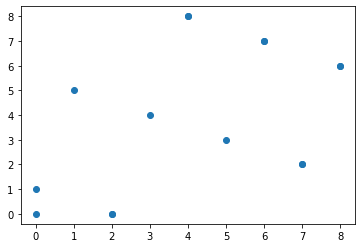

In [1]:
import numpy as np
import matplotlib.pyplot as plt

numbers = [4]
#numbers.append(4)
for i in range(1,15):
    r = (4*numbers[i-1]+1)%9
    numbers.append(r)
print(numbers)

next_numbers = []
for i in range(14):
    next_numbers.append(numbers[i+1])
next_numbers.append(0)
print(next_numbers)

plt.figure()
plt.plot(numbers, next_numbers, "o")
plt.show()

*Exercise*: Why are there only 10 points, when our number series is longer than 10 random numbers?

You should always make a graphical
display of your random numbers. Your visual cortex is quite refined at
recognizing patterns and will tell you immediately if there is one in
your random numbers.  In this particular sequence, the random number sequence does not seem to give uniform coverage in the 2-D plane.  There also seems to be a correlation between numbers $x_i$ and $x_{i+1}$ in the sequence.

In order to obtain a longer sequence, $a$ and $M$ should
be large numbers but not so large that $ar_{i-1}$ overflows the machine representation.
A 32-bit generator may use $M=2^{31}
\simeq 2 \times 10^{9}$.  If your program uses approximately this
many random numbers, you may need to reseed (start the sequence over again with a different initial value) during intermediate steps to avoid the cycle repeating.

In Python we  use  `random.random()`, the Mersenne Twister generator.
It is probably the only random number generator you'll ever have to use.
To initialize a random sequence, you need to plant a seed in it. 
In Python the statement `random.seed(None)` seeds the generator (any generator) with the system time, which is approximately random.  
The problem with this approach is that your calculation is not reproducible.
A better approach is to use a seed like `random.seed(1)`.

Then the random number sequence is generated uniformly on some interval, which is [0,1] for the `random.random()` function.

In [14]:
import random

numbers = []
random.seed(1)
for i in range(15):
    r = random.random()
    numbers.append(r)
print(numbers)

next_numbers = []
for i in range(14):
    next_numbers.append(numbers[i+1])
next_numbers.append(0)

plt.plot(numbers, next_numbers, "o")
plt.show()

[0.6229016948897019, 0.7417869892607294, 0.7951935655656966, 0.9424502837770503, 0.7398985747399307, 0.922324996665417, 0.029005228283614737, 0.46562265437810535, 0.9433567169983137, 0.6489745531369242, 0.9009004917506227, 0.11320596465314436, 0.46906904778216374, 0.24657283261983032, 0.5437608592359304]


*Exercise*: compare the generated random number outputs for two separate cases:
* With no seed (random seed taken from system clock)
* With seed set explicitly to 1 (compare your results with a neighbor)

Sometimes your eyes can be *too* efficient at spotting patterns, where none exist.
For this reason, it is best to calculate some quantitative estimates of randomness and uniformity.

### Assessing Randomness and Uniformity

Some tests are simple enough
for you to make it a habit to run them simultaneously with your
simulation. In the two examples that follow, we test for
randomness and  uniformity. 

1. A simple test of uniformity evaluates the $k$th moment of a distribution:  

   $$\langle x^{k}\rangle = \frac{1}{N} \sum_{i=1}^{N} x_{i}^{k}$$  
   
   If the numbers are distributed *uniformly*, then the $k$th moment $\langle x^{k}\rangle$ is approximately the $k$th moment of the uniform distribution function $P(x)$:  

   $$\frac{1}{N} \sum_{i=1}^{N} x_{i}^{k} \simeq
    \int_{0}^{1}dx\;
    x^{k}P(x)  \simeq  \frac{1}{k+1}  + O\left(\frac{1}{\sqrt{N}}\right)$$  
   
   If $\langle x^{k}\rangle = \frac{1}{k+1}$ holds for your generator, then you know that the distribution is uniform. 
   If the deviation from $\frac{1}{k+1}$ varies as $1/\sqrt{N}$, then you *also* know that the distribution is random because the $1/\sqrt{N}$ result derives from assuming randomness.  

   A very simple way to check this all in one shot is to calculate  

   $$\sqrt{N} \left| \frac{1}{N} \sum_{i=1}^{N} x_{i}^{k}
-\frac{1}{k+1}\right|$$
   
   and check that it is of order $1$.

2. Another simple test determines the near-neighbor correlation in your random sequence by taking sums of products for small $k$:

   $$C(k) = \frac{1}{N} \sum_{i=1}^{N} x_{i}\ x_{i+k}, \quad (k = 1, 2,
\ldots)$$
   
   If your random numbers $x_{i}$ and $x_{i+k}$ are distributed with the joint probability distribution $P(x_{i}, x_{i+k})=1$ and are independent and uniform, then $C(k)$ can be approximated as an integral:

   $$\frac{1}{N} \sum_{i=1}^{N} x_{i} \,x_{i+k} \simeq \int_{0}^{1}dx
   \int_{0}^{1}dy\, xy \, P(x, y)
 = \int_{0}^{1}dy\, xy   = \frac{1}{4}$$
   
   If $C(k)=\frac{1}{4}$ holds for your random numbers, then you know that they are uniform and independent.
   If the deviation from $\frac{1}{4}$ varies as $1/\sqrt{N}$, then you *also* know that the distribution is random. 

In [17]:
#### N = 10000
numbers = np.zeros(N)
random.seed(3)
for i in range(N):
    numbers[i] = random.random()

# Test 1
print('Test 1:')
for k in (1,3,7):
    sum = 0.0
    for i in range(N):
        sum += pow(numbers[i],k)
    check = np.sqrt(N) * abs(sum/N - 1./(k+1.))
    print(k, check)
    
# Test 2
print('Test 2:')
for k in (1,3,7):
    sum = 0.0
    for i in range(N-k):
        sum += numbers[i]*numbers[i+k]
    check = np.sqrt(N-k) * abs(sum/(N-k) - 1./4.)
    print(k, check)     

Test 1:
1 0.04956671610111263
3 0.06829485649992861
7 0.19752441890710792
Test 2:
1 0.001059471977182932
3 0.14352441117866555
7 0.06220471160969895


The first set of numbers should be of order 1 for a uniform sequence.
The second set of numbers should also be of order 1 for a uniform sequence.  Try increasing $N$ to see what happens.

### Quasi-random Number Sequences

There is another class of number sequences called *quasi-random* sequences.
These sequences provide uniform coverage, but they are not random.
A prime example is the <a href="https://en.wikipedia.org/wiki/Sobol_sequence">Sobol sequence</a>.
These quasi-random sequences have specific uniformity properties, but they are not even pseudo-random.
("Quasi-random" is probably a misnomer, but we seem to be stuck with it.)
We will return to quasi-random sequences when we develop multi-dimensional integration.

## Random Walks

You may recall that we had two applications in mind for random number sequences.  The second was the "exploration of a large phase space via random walks."

A random walk is an N-dimensional trajectory whose evolution is governed by a random number sequence.  At each point in the trajectory, a random number determines the directions (and sometimes the step distance) to the next point.

The classic random walk example is diffusion of an air molecule, which follows a three-dimensional trajectory in space.
But the random walk can be in any number of dimensions and in any space.
Another example is the phase space of spins in a 1-D chain of $N$ spin sites (the Ising model).

This "random walk" takes us to random coordinates $(x,y)$ with both $x$ and $y$ in the range $[0,1]$.  This is not exactly what our book calls a random walk.  (Why not?)

<IPython.core.display.Javascript object>


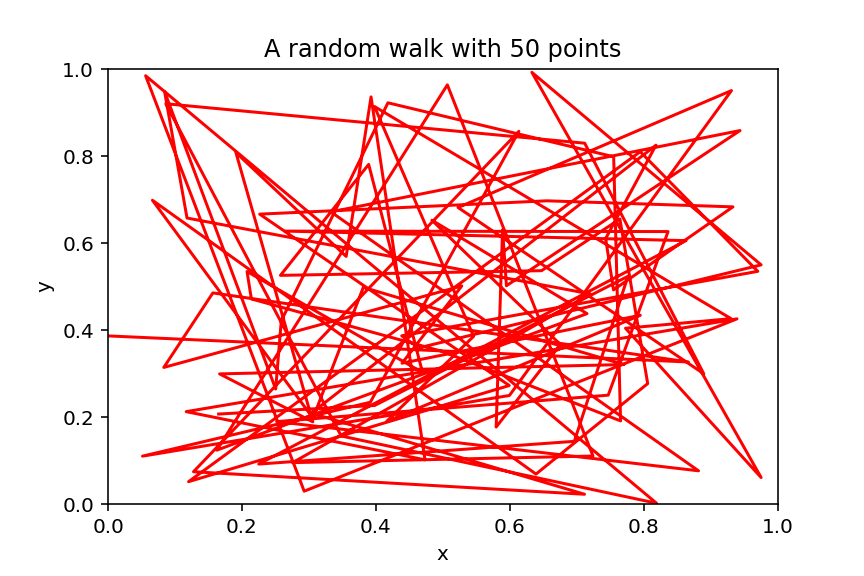

C:\Users\palec\anaconda3\lib\site-packages\matplotlib\animation.py:973: UserWarning: Animation was deleted without rendering anything. This is most likely unintended. To prevent deletion, assign the Animation to a variable that exists for as long as you need the Animation.
  warnings.warn(


In [18]:
# Random walk from matplotlib documentation

%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def update_line(num, data, line):
    line.set_data(data[..., :num])
    return line

fig1 = plt.figure()

data = np.random.rand(2, 100)
l, = plt.plot([], [], 'r-')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('x')
plt.ylabel('y')
plt.title('A random walk with 50 points')
line_ani = animation.FuncAnimation(fig1, update_line, 100, fargs=(data, l),
                                   interval=100, blit=True)
plt.show()

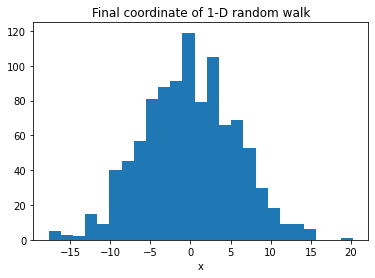

In [30]:
# Random walk in 1 dimension
%matplotlib inline

num_walks = 1000
num_steps = 100
final_xvalues = []

for iwalk in range(num_walks):
    data = np.random.rand(num_steps)
    random_steps = data*2. - 1. # allows for negative steps
    current_x = 0.0
    for random_step in random_steps:
        current_x += random_step
        #if iwalk==1:
        #    print(current_x)
    final_xvalues.append(current_x)

plt.hist(final_xvalues, bins='auto')
plt.xlabel("x")
plt.title("Final coordinate of 1-D random walk")
plt.show()

This histogram shows the end point of many 1-D random walks. 
We can see that the mean value of the position is 0, and the distribution seems to be a Gaussian distribution.
We formalize these observations in the next section.

### Random-Walk Analysis (2-D)
   
Although each step may be in a different direction, the distances
along each Cartesian axis just add arithmetically. Accordingly, the radial distance $R$ from the starting point
after $N$ steps is

$$\begin{align}
R^{2} & =  (\Delta x_{1} + \Delta  x_{2} + \cdots + \Delta
x_{N})^{2} + (\Delta y_{1} + \Delta y_{2} + \cdots +
\Delta y_{N})^{2}  \\
& =  \Delta x_{1}^{2} +\Delta x_{2}^{2} +\cdots +\Delta x_{N}^{2}
+2\Delta  x_{1}\Delta x_{2} +2\Delta x_{1}\Delta  x_{3} +2\Delta
x_{2}\Delta  x_{1} + \cdots   \\
& +\, (x  \rightarrow y)
\end{align}$$
   
If the walk is random, the particle is equally likely to travel in
any direction (positive or negative in each coordinate) at each step.
If we take the average of a large number of such random steps, all the cross terms vanish and we will be left with

$$\begin{align} 
R^{2}_\text{rms} & \simeq   \langle \Delta x_{1}^{2} +\Delta
x_{2}^{2} +\cdots +\Delta x_{N}^{2} + \Delta  y_{1}^{2} +\Delta
y_{2}^{2} +\cdots +\Delta y_{N}^{2} \rangle\\
 & =  \langle \Delta x_{1}^{2} + \Delta  y_{1}^{2}\rangle + \langle \Delta x_{2}^{2}+\Delta y_{2}^{2}\rangle
+\cdots\\
  & =  N \langle  r^{2}  \rangle = N r^2_\text{rms}
\end{align}$$

Finally, 
$$R_\text{rms}  \simeq \sqrt{N} r_\text{rms} $$   
where $r_\textrm{rms} = \sqrt{\langle r^{2} \rangle}$ is the
*root-mean-square* step size. 

If the walk is random, then we expect that after a
large number of steps the average *vector* distance from
the origin $R$ will be 0:  

$$\langle \overrightarrow{R} \rangle = \langle x \rangle \overrightarrow{i} + \langle y \rangle \overrightarrow{j}
  \simeq 0$$
  
But it is still true that the
average *scalar* distance from the origin is $\sqrt{N}
r_\text{rms}$, where each step is of average length $r_\text{rms}$. In
other words, the vector endpoint will be distributed uniformly in
all quadrants, and so the displacement vector averages to zero,
but the average length of that vector does not. For large $N$ values,
$\sqrt{N} r_\text{rms} \ll N r_\text{rms}$ (the value if all steps were in one direction on a straight line), but does not vanish. 

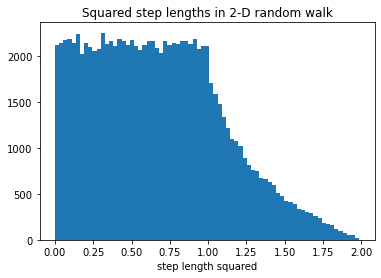

Mean step length squared is  0.6679773249737582
r_{rms} = 0.8172987978541008


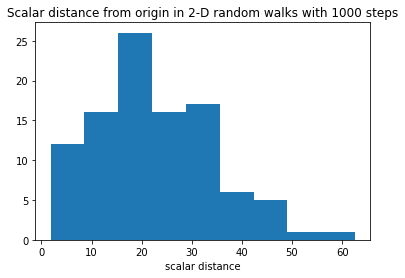

Mean scalar distance is  22.407741804835155


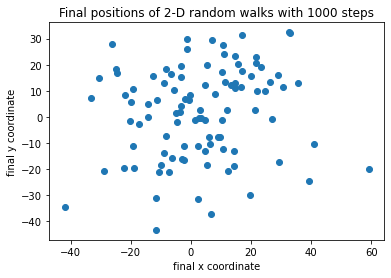

In [31]:
# Random walk in 2 dimensions
%matplotlib inline

num_walks = 100
num_steps = 1000
final_xvalues = []
final_yvalues = []
final_scalar_distance = []
step_length_sq = []
for iwalk in range(num_walks):
    data = np.random.rand(2,num_steps)
    steps = data*2. - 1.
    current_x = 0.0
    current_y = 0.0
    # zip function combines the two lists into ordered pairs
    for (x_step,y_step) in zip(steps[0], steps[1]):
        step_length_sq.append(pow(x_step,2) + pow(y_step,2))
        current_x += x_step
        current_y += y_step
    final_xvalues.append(current_x)
    final_yvalues.append(current_y)
    final_scalar_distance.append(np.hypot(current_x, current_y))

# This is just for plotting the pretty pictures
plt.hist(step_length_sq, bins='auto')
plt.xlabel("step length squared")
plt.title("Squared step lengths in 2-D random walk")
plt.show()
print("Mean step length squared is ", np.mean(step_length_sq))
print("r_{rms} =", np.sqrt(np.mean(step_length_sq)))

plt.hist(final_scalar_distance, bins='auto')
plt.xlabel("scalar distance")
plt.title("Scalar distance from origin in 2-D random walks with %d steps" % num_steps)
plt.show()
print("Mean scalar distance is ", np.mean(final_scalar_distance))

plt.plot(final_xvalues, final_yvalues, "o")
plt.xlabel("final x coordinate")
plt.ylabel("final y coordinate")
plt.title("Final positions of 2-D random walks with %d steps" % num_steps)
plt.show()

This 2-D random walk can be used, for example, to find the distribution of a diffused perfume molecule after some number of collisions.  It can also be used to generate a random walk through an abstract parameter space, known as a Markov chain.

## Return to physics application: diffusion

Let's implement the random walk of a single perfume molecule in 0.1-second steps over 5 minutes.

We will assume that each interaction results in a random direction, and we will assume that the air molecule velocity is $u = \sqrt{\frac{3RT}{M}}$.

In [7]:
R = 8.314 # kg m^2/s^2/ K/mol
T = 300 # K
M = 0.028 # kg/mol
u = np.sqrt(3*R*T/M)
print('rms velocity =', u, "m/s")

rms velocity = 516.9484638585498 m/s


<IPython.core.display.Javascript object>


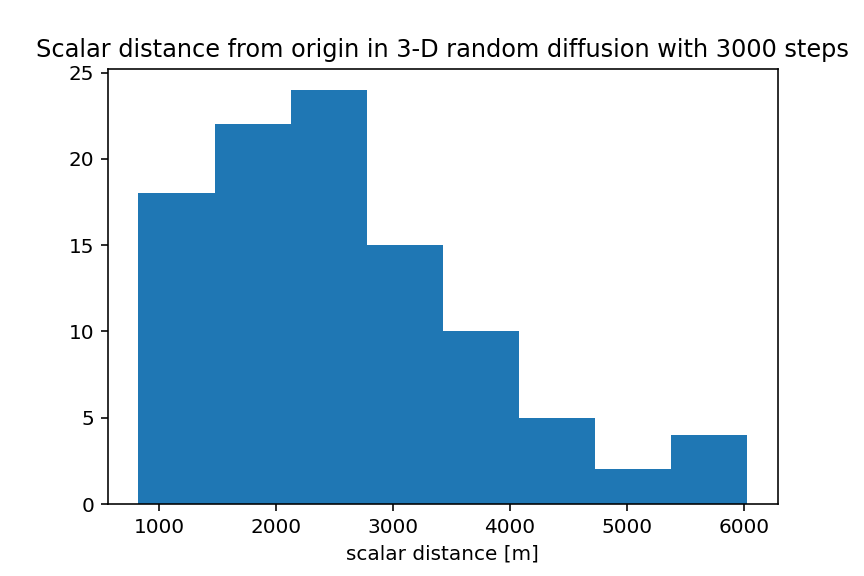

Mean scalar distance is  2574.063795695055


<IPython.core.display.Javascript object>


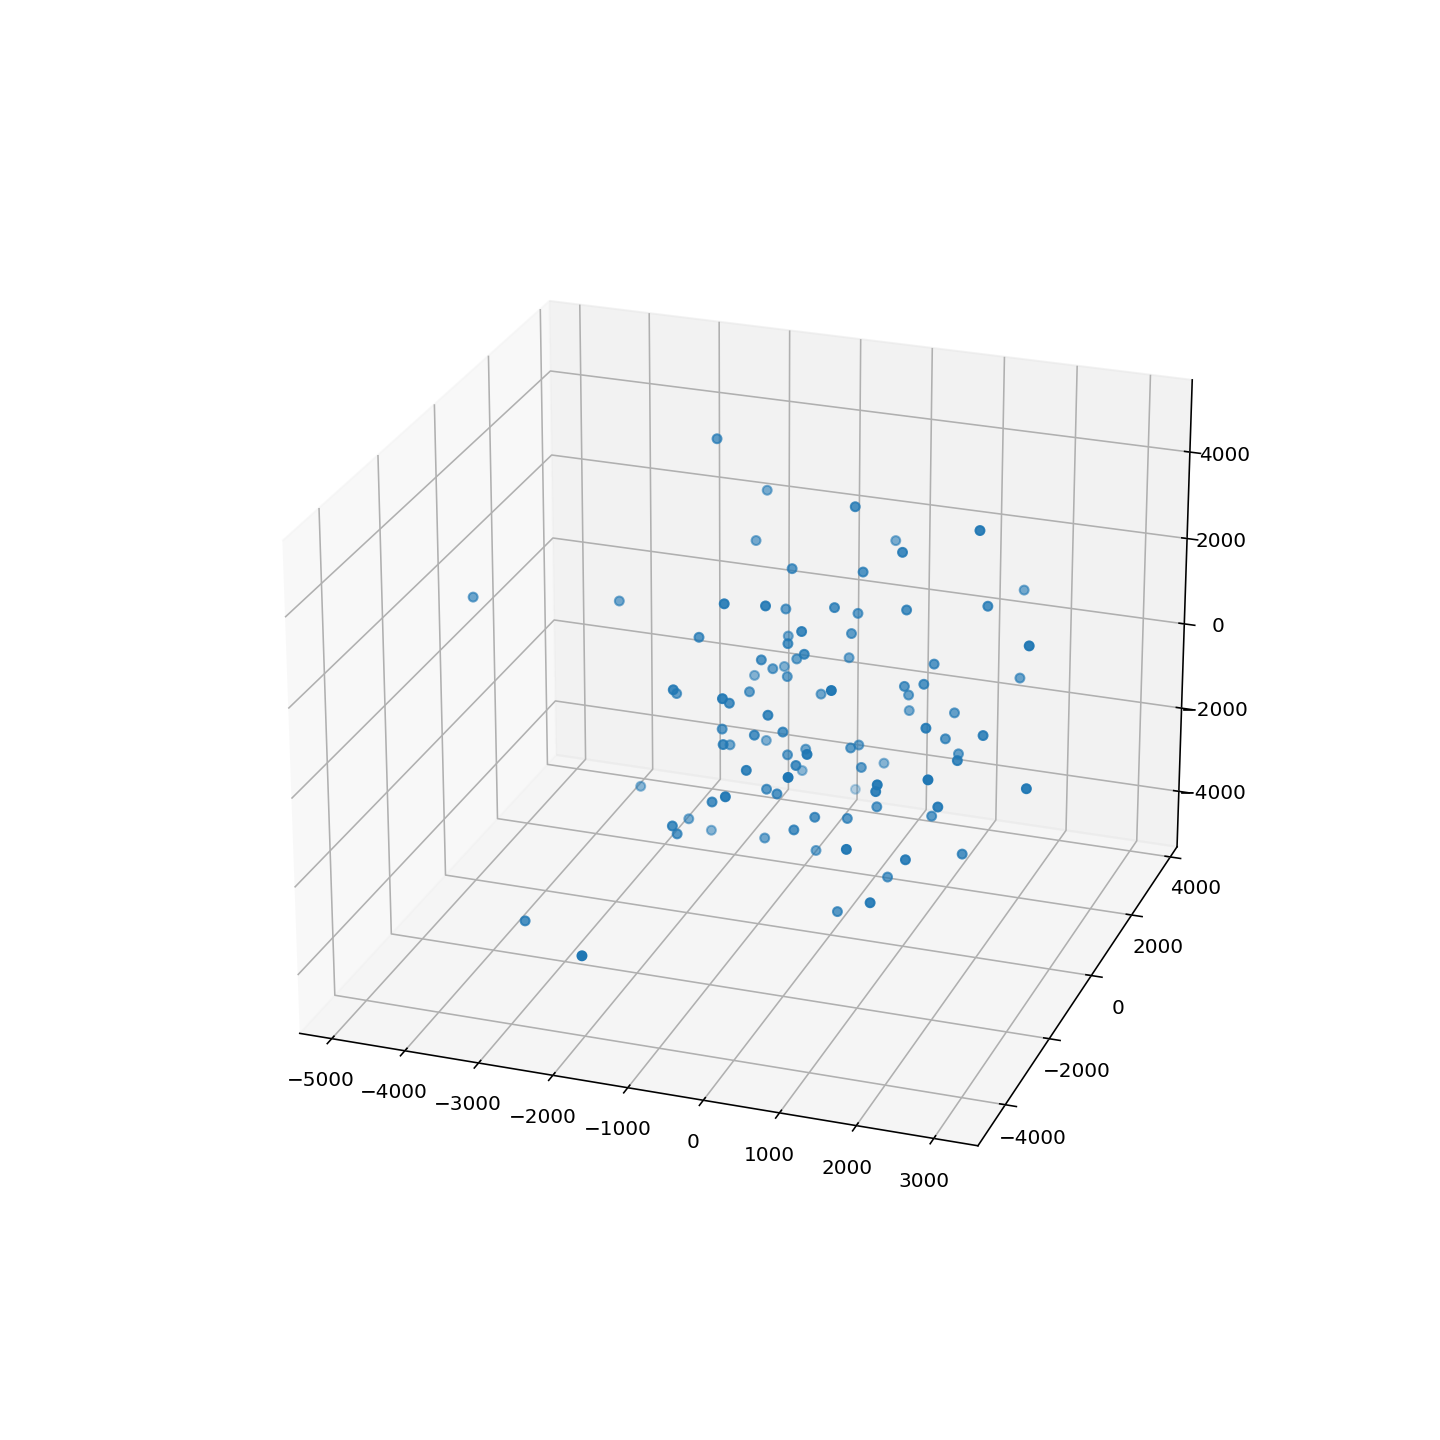

In [33]:
# Random walk of a perfume molecule in 3 dimensions
%matplotlib notebook

dt = 0.1 # seconds
time_period = 5*60 # seconds
num_steps = time_period/dt
step_length = u * dt

num_walks = 100
final_xvalues = []
final_yvalues = []
final_zvalues = []
final_scalar_distance = []

for iwalk in range(num_walks):
    current_x = 0.0
    current_y = 0.0
    current_z = 0.0
    # zip function combines the two lists into ordered pairs
    for step in range(int(num_steps)):
        theta = np.random.uniform(0., 2.*np.pi)
        phi = np.random.uniform(0., np.pi)
        x_step = step_length * np.sin(theta) * np.cos(phi)
        y_step = step_length * np.sin(theta) * np.sin(phi)
        z_step = step_length * np.cos(theta)

        current_x += x_step
        current_y += y_step
        current_z += z_step
        
    final_xvalues.append(current_x)
    final_yvalues.append(current_y)
    final_zvalues.append(current_z)
    final_scalar_distance.append(np.sqrt(current_x**2 + current_y**2 + current_z**2))

# This is just for plotting the pretty pictures
plt.hist(final_scalar_distance, bins='auto')
plt.xlabel("scalar distance [m]")
plt.title("Scalar distance from origin in 3-D random diffusion with %d steps" % num_steps)
plt.show()
print("Mean scalar distance is ", np.mean(final_scalar_distance))

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.scatter3D(final_xvalues, final_yvalues, final_zvalues)
plt.show()